In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [102]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [103]:
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [104]:
dataset = dataset.drop(["User ID"], axis=1)

In [105]:
dataset

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [106]:
encoder = OneHotEncoder(drop="first")
encoded = encoder.fit_transform(dataset[['Gender']]).toarray()

In [107]:
dataset_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out(["Gender"]))

In [108]:
dataset = pd.concat([dataset.drop('Gender', axis=1),dataset_df], axis=1)

In [109]:
dataset

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1.0
1,35,20000,0,1.0
2,26,43000,0,0.0
3,27,57000,0,0.0
4,19,76000,0,1.0
...,...,...,...,...
395,46,41000,1,0.0
396,51,23000,1,1.0
397,50,20000,1,0.0
398,36,33000,0,1.0


In [112]:
x = dataset[["Age", "EstimatedSalary", "Gender_Male"]]
y = dataset["Purchased"]

In [124]:
sd = StandardScaler()
sd.fit(x)
x = pd.DataFrame(sd.transform(x), columns=x.columns)

In [125]:
x

,Age,EstimatedSalary,Gender_Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204
...,...,...,...
395,0.797057,-0.844019,-0.980196
396,1.274623,-1.372587,1.020204
397,1.179110,-1.460681,-0.980196
398,-0.158074,-1.078938,1.020204


In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
ds = DecisionTreeClassifier()
ds.fit(x_train, y_train)

DecisionTreeClassifier()

In [134]:
ds.score(x_test, y_test)*100

85.0

In [140]:
ds.predict(x_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [141]:
from sklearn.tree import plot_tree

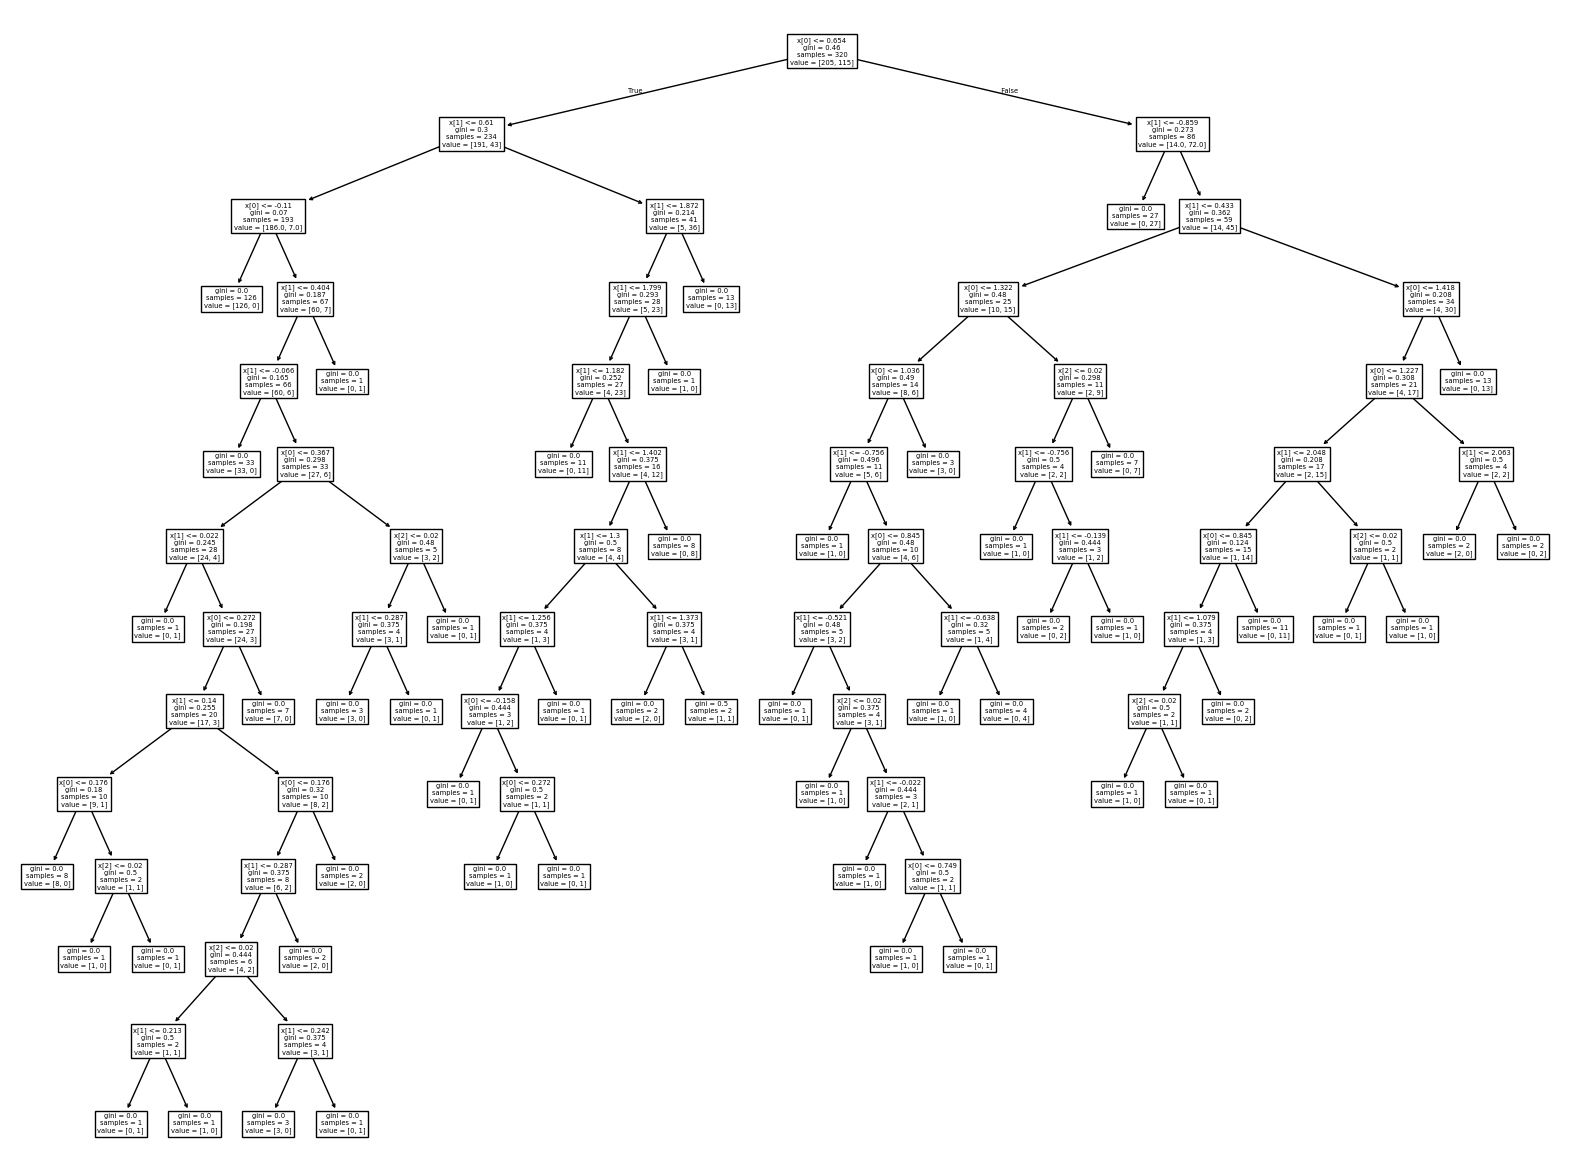

In [145]:
plt.figure(figsize=(20, 15))
plot_tree(ds)
plt.show()